In [210]:
# Import libraries 
import matplotlib.pyplot as plt
import os, requests
import numpy as np
import pandas as pd
import csv
import seaborn as sb
import matplotlib as pt
from scipy import stats
from matplotlib import rcParams
import statsmodels.stats.proportion as proportion
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

### Load Dataset

In [3]:
# Add file location
os.chdir('C:\\Users\\francon\\Downloads\\data')

In [4]:
# Load necessary  files into dataframes
cardiodf = pd.read_csv("cardio_base.csv", error_bad_lines=False, warn_bad_lines=False, encoding='latin-1',delimiter = ",")
alcodf = pd.read_csv("cardio_alco.csv", error_bad_lines=False, warn_bad_lines=False, encoding='latin-1',delimiter = ";")

In [5]:
# check df
cardiodf.head(1)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0


### Data Cleaning

In [84]:
# Verify missing data per column
for column in cardiodf.isnull().columns.values.tolist():  
    print(column)
    print(cardiodf.isnull()[column].value_counts()) 

id
False    70000
Name: id, dtype: int64
age
False    70000
Name: age, dtype: int64
gender
False    70000
Name: gender, dtype: int64
height
False    70000
Name: height, dtype: int64
weight
False    70000
Name: weight, dtype: int64
ap_hi
False    70000
Name: ap_hi, dtype: int64
ap_lo
False    70000
Name: ap_lo, dtype: int64
cholesterol
False    70000
Name: cholesterol, dtype: int64
smoke
False    70000
Name: smoke, dtype: int64
alco
False    56903
True     13097
Name: alco, dtype: int64


In [7]:
# Check datatype
cardiodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB


In [8]:
# convert days into years and round down column age
cardiodf['age'] = (cardiodf['age']/365).apply(np.floor).astype('int')

In [9]:
# show statistics information
cardiodf.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


We can analyze some values with this table. It seems they are some observations that it could be outliers that represent variance or a mistake in the data. 
- The minimum weight is 10. There are people with 165 height and 10 of weight, so this could be wrong data. 
At this point it is important to evaluate dropping this information before analyzing the variables or investigate if it is wrong data or represents an outlier.

- I consider investigate the outliers before dropping the weight and height

### Bivariate Analysis

<b> 1.When asked about age, please calculate with age in years rounded down. 
How much heavier is the age group with the highest average weight than the age group with the lowest weight?</b>

<AxesSubplot:xlabel='age', ylabel='weight'>

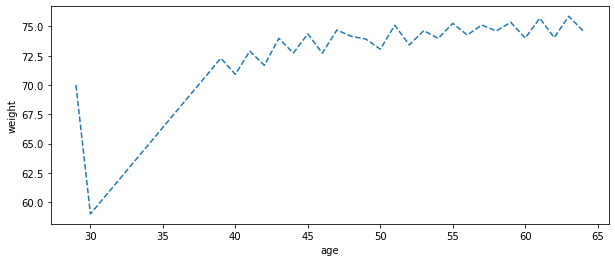

In [10]:
# we converted the age in years
plt.figure(figsize=(10,4))
sb.lineplot(data=cardiodf.groupby('age')['weight'].mean(), linestyle="--")

In [11]:
cardiodf.groupby(['age'])['weight'].mean().max()-cardiodf.groupby(['age'])['weight'].mean().min()

16.873720760233923

R1.<b>As we can see the age group with the highest average is 63 years with an average of 75,8 and the lowest weight is 30 years with 59. People with the highest average is 16,8 weightier than lowest.


<b> 2.Do people over 50 have higher cholesterol levels than the rest? If so, what is the percentage of that difference?

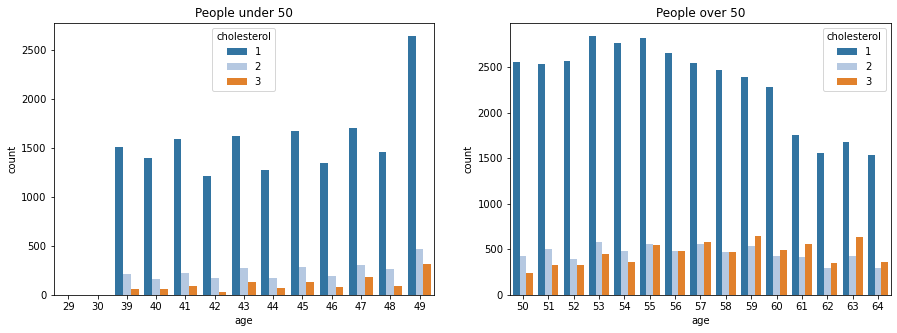

In [12]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
fig, ax =plt.subplots(1,2)
sb.countplot(x='age', hue='cholesterol', data = cardiodf[(cardiodf["age"] <50)], palette="tab20", ax=ax[0]).set(title='People under 50')
sb.countplot(x='age', hue='cholesterol', data = cardiodf[(cardiodf["age"] >=50)], palette="tab20", ax=ax[1]).set(title='People over 50')
fig.show()

- It can be observed that people over 50 have higher cholesterol levels than the rest considering the levels 2 and 3 are higher than 1

In [13]:
cholesdf = pd.DataFrame()
cholesdf["total_cholesterol"]=cardiodf.groupby('cholesterol')['id'].count()

In [14]:
 # get the people count   over 50 years per level of cholesterol
cholesdf["cholesterol_over_50"]=cardiodf[(cardiodf["age"]>50)].groupby('cholesterol')['id'].count()
#get the people count   lower than 50 years per level of cholesterol
cholesdf["cholesterol_under_50"]=cardiodf[(cardiodf["age"]<=50)].groupby('cholesterol')['id'].count()

In [15]:
# obtain the percentages
cholesdf["cholesterol_over_50_perc"]=round((cholesdf["cholesterol_over_50"]/cholesdf["total_cholesterol"])*100,2)
cholesdf["cholesterol_under_50_perc"]=round((cholesdf["cholesterol_under_50"]/cholesdf["total_cholesterol"])*100,2)

In [16]:
# obtain the differences per level
cholesdf["cholesterol_diff_perc"]=cholesdf["cholesterol_over_50_perc"]-cholesdf["cholesterol_under_50_perc"]

 - I calculated the difference on each level, so we can check the percentage of differences per level of cholesterol

In [17]:
cholesdf.head()

,total_cholesterol,cholesterol_over_50,cholesterol_under_50,cholesterol_over_50_perc,cholesterol_under_50_perc,cholesterol_diff_perc
cholesterol,,,,,,
1,52385,32388,19997,61.83,38.17,23.66
2,9549,6401,3148,67.03,32.97,34.06
3,8066,6586,1480,81.65,18.35,63.30


- If we consider high level cholesterol 2 and 3 and get a percentage

In [18]:
# percentage of level 2 and 3 over 50
sum_cholesterol_over_50_perc =(cholesdf.iloc[2]["cholesterol_over_50"]+cholesdf.iloc[1]["cholesterol_over_50"])/(cholesdf.iloc[2]["total_cholesterol"]+cholesdf.iloc[1]["total_cholesterol"])*100
# percentage of level 2 and 3 under 50
sum_cholesterol_under_50_perc=(cholesdf.iloc[2]["cholesterol_under_50"]+cholesdf.iloc[1]["cholesterol_under_50"])/(cholesdf.iloc[2]["total_cholesterol"]+cholesdf.iloc[1]["total_cholesterol"])*100

In [19]:
round(sum_cholesterol_over_50_perc-sum_cholesterol_under_50_perc,2)

47.45

R2. <b>We can check the differences per level but if we assume that level 2 and 3 are high levels of cholesterol the percentage of people over 50 is around 47,45%

<b>3) Are men more likely to be a smoker than women? If so, how many times more? The data contains information to identify gender IDs.

- It is necessary to compare the current information per gender to analyze which of IDs belongs to women and men.


In [20]:
cardiodf.groupby(['gender'])['height','weight'].agg(['mean'])

,height,weight
,mean,mean
gender,,
1,161.355612,72.565605
2,169.947895,77.257307


- Usually, men are taller and heavier than women, so we can assume based on avg of these variables that value 2 belongs to men and value 1 belongs to women.

In [21]:
# shows the amount of smokers per gender
x=cardiodf.groupby('gender')['smoke'].sum()
x

gender
1     813
2    5356
Name: smoke, dtype: int64

In [22]:
# get the number of times that men are more smokers than women
round(x[2]/x[1],2)

6.59

R3. <b> Considering 1 as women and 2 as men. we can see that men are around 6,6 times more smokers than women

<b>4) How tall are the tallest 1% of the people?

In [23]:
# to get how tall are the tallest 1% of people i should get the 99 percentile and max value of height
print("Max Value",cardiodf["height"].max())
print("99 P",cardiodf["height"].quantile(0.99))

Max Value 250
99 P 184.0


R4.<b>The range is between 184 and 250

### Multivariate Analysis

<b>5) Which two features have the highest spearman rank correlation?</b> 

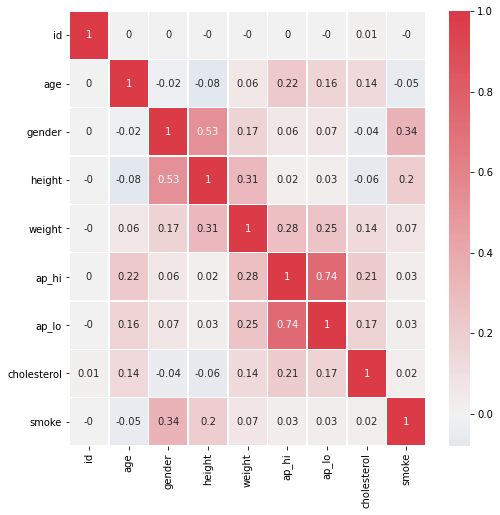

In [24]:
# Shows the correlation between variables using the spearman method
plt.figure(figsize= (8,8))
cmap = sb.diverging_palette(250, 10, as_cmap=True)
ax = sb.heatmap(round(cardiodf.corr(method="spearman"),2),center = 0,annot= True,linewidth=0.5,cmap= cmap)

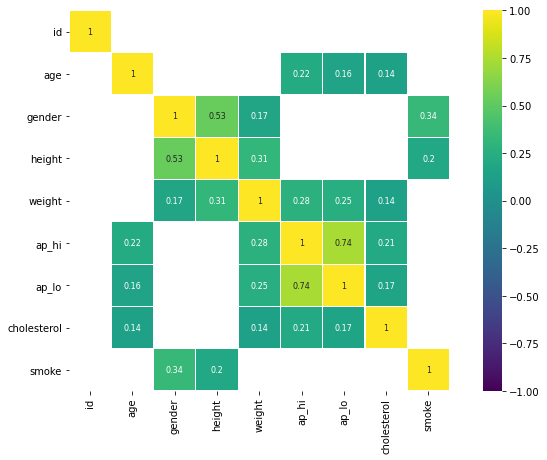

In [25]:
# shows heatmap with highest correlation 
corr = cardiodf.corr(method="spearman") 
plt.figure(figsize=(12,7))

sb.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size":8}, square=True);

R5.<b>ap_lo</b> and <b>ap_hi</b> <b>show the highest correlation with 0,74. Also It is important to highlight other relations
between height and gender, and smoke and gender.

<b>6) What percentage of people are more than 2 standard deviations far from the average height?

In [26]:
# we need to get the mean and std of height 
cardiodf["height"].describe()

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

In [27]:
# calculate the limit over 2 std
cardiodf["height"].mean()+2*cardiodf["height"].std()

180.77948130050484

In [81]:
# get the percentage of people over 2 std and send mean and 2 std
import scipy.stats
(scipy.stats.norm(164.36,8.21).sf(180.77))*100

2.2815974541377178

R6.<b> around 2,27 % of people are more than 2 standard desviations far from the average height

<b>7) What percentage of the population over 50 years old consume alcohol? Also use the cardio_alco.csv and merge the datasets on ID. Ignore those persons, where we have no alcohol consumption information.

In [59]:
# get the total of people over 50 years old
cardiodf[(cardiodf["age"]>50)]["id"].count()

45375

In [30]:
# merge the datasets to get alco variable
cardiodf = pd.merge(cardiodf, alcodf,on='id', how='left')

In [31]:
cardiodf.head(1)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
0,0,50,2,168,62.0,110,80,1,0,NaN


In [72]:
# get the count of people over than 50 years by level alcohol 
x_alco = (cardiodf[(cardiodf["age"] >50)].groupby(cardiodf["alco"] == 1)["id"].count())
print(x_alco)

alco
False    43565
True      1810
Name: id, dtype: int64


 - To calculate the percentage of the population over 50 years old that consume alcohol, it is important get the total amount of people over 50 and the amount of people that consume alcohol and are over 50

In [78]:
# get the percentage of people (people that)
round((x_alco[1]/cardiodf[(cardiodf["age"]>50)]["id"].count())*100,2)

3.99

R7. <b>The percentage of the population over 50 years old that consume alcohol is around 3,99 % and 5% when you ignore people with  no alcohol information

<b>8) Which of the following statements is true with 95% confidence?

a) Smokers have higher blood pressure than non-smokers

b) Smokers have higher cholesterol level than non smokers

c) Smokers weight less than non smokers

d )Men have higher blood pressure than women

<b>a) Smokers have higher blood pressure than non-smokers

 We have to define a hypothesis test with 95% of confidence.
    <br>At that case, the definition would be
        <br>- Smokers have higher blood pressure level than non-smokers (H1)<br> 
        - Null hypothesis (H0)<br>
        
I use the function ttest_ind from scipy to apply the hypothesis

In [200]:
# Apply ap_hi  Hypothesis test using 95% of confidence
t_value,p_value = stats.ttest_ind(cardiodf.ap_hi[cardiodf.smoke.eq(1)],cardiodf.ap_hi[cardiodf.smoke.eq(0)], alternative ='greater',equal_var=False)
if p_value < 0.05:
    print('Smokers have higher blood pressure than non-smokers')
else:
    print('Null hypothesis')

Null hypothesis


In [216]:
# Apply ap_lo  Hypothesis test using 95% of confidence
t_value,p_value = stats.ttest_ind(cardiodf.ap_lo[cardiodf.smoke.eq(1)],cardiodf.ap_lo[cardiodf.smoke.eq(0)], alternative ='greater',equal_var=False)
if p_value < 0.05:
    print('Smokers have higher blood pressure than non-smokers')
else:
    print('Null hypothesis')

Null hypothesis


Ra.<b> After Hypothesis testing, we can noticed this statement is False

<b>b) Smokers have higher cholesterol level than non smokers

These variables are categorical, and we need to compare the level of cholesterol per smokers and non-smokers
The following graphic shows that non-smokers have fewer levels (taking level 2 and 3 as high levels) of cholesterol.
We can consider accepted the affirmation, but it is important to check the hypothesis using chi square 

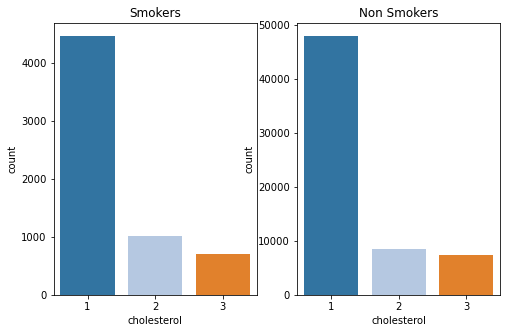

In [201]:
fig, ax =plt.subplots(1,2)
sb.countplot(x='cholesterol', data = cardiodf[(cardiodf["smoke"] ==1)], palette="tab20", ax=ax[0]).set(title='Smokers')
sb.countplot(x='cholesterol', data = cardiodf[(cardiodf["smoke"] ==0)], palette="tab20", ax=ax[1]).set(title='Non Smokers')
fig.show()

In [108]:
# get the frequencies to compare the level of cholesterol
cardiodf.groupby([ 'smoke','cholesterol'])['id'].count().to_frame()

id
smoke cholesterol       
0     1            47922
      2             8540
      3             7369
1     1             4463
      2             1009
      3              697

In [214]:
# apply chi2 to compare proportions and ztest
from statsmodels.stats.proportion import proportions_chisquare, proportions_ztest

val, p, tab = proportions_chisquare(count = [1009, 697],
                                     nobs = [8540, 7369],
                                  )

x,p_value = proportions_ztest(count=[1009, 697],
                  nobs=[8540, 7369], 
                  alternative='larger')
if p_value < 0.05:
    print('Smokers have higher cholesterol level than non smokers')
else:
    print('Null hypothesis')


Smokers have higher cholesterol level than non smokers


Rb.<b> After Hypothesis testing we can notice that this statement is True

<b>c) Smokers weight less than non smokers

In [175]:
# using the mean between smokers and non smokers, non smokers weight less than smokers
print(cardiodf[(cardiodf["smoke"] == 1)]['weight'].mean())
print(cardiodf[(cardiodf["smoke"] == 0)]['weight'].mean())

77.34435078618901
73.90235152198775


In [179]:
# Apply ap_hi  Hypothesis test using 95% of confidence
t_value,p_value = stats.ttest_ind(cardiodf.weight[cardiodf.smoke.eq(1)],cardiodf.weight[cardiodf.smoke.eq(0)], alternative ='less',equal_var=False)
if p_value < 0.05:
    print('Smokers have less weight than non-smokers')
else:
    print('Null hypothesis')

Null hypothesis


Rc.<b> After Hyphotesis testing we can notice that this statement is False

<b>d) Men have higher blood pressure than women

In [193]:
print(cardiodf[(cardiodf["gender"] == 1)]['ap_hi'].mean())
print(cardiodf[(cardiodf["gender"] == 1)]['ap_lo'].mean())

128.1392488469141
94.52277619152207


In [194]:
print(cardiodf[(cardiodf["gender"] == 2)]['ap_hi'].mean())
print(cardiodf[(cardiodf["gender"] == 2)]['ap_lo'].mean())

130.07887208827134
100.55198201879853


In [198]:
# Apply ap_hi  Hypothesis test using 95% of confidence
t_value,p_value = stats.ttest_ind(cardiodf.ap_lo[cardiodf.gender.eq(2)],cardiodf.ap_lo[cardiodf.gender.eq(1)], alternative ='greater',equal_var=True)
if p_value < 0.05:
    print('Men have higher blood pressure than women')
else:
    print('Null hypothesis')

Men have higher blood pressure than women


Rd.<b> After Hyphotesis testing we can notice that this statement is True